In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

##**data preparation**

In [2]:
data = load_iris()

In [3]:
X_raw = data.data
Y_raw = data.target

In [4]:
X = X_raw[:100]
Y = Y_raw[:100] #Taking Iris-Setosa and Iris-versicolor

X = X[:,2:4] #Taking petal length and petal width

##**data analysis**

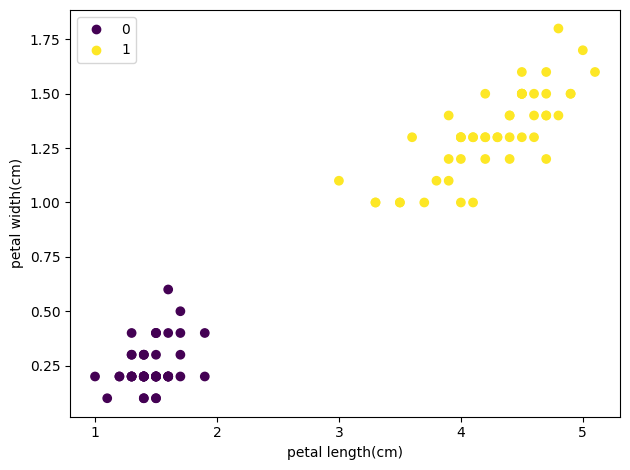

In [5]:
scatter = plt.scatter(X[:, 0], X[:,1], c=Y)

plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")

plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.tight_layout()
plt.show()

##**standardization**

In [6]:
sc = StandardScaler()
sc = sc.fit(X)
X_std = sc.transform(X)

##**stochastic Gradient Descent**

In [7]:
w0 = 0
w1 = 0
w2 = 0

In [8]:
a = 0.01
n = X_std.shape[0]

In [9]:
for i in range(n):
  y = Y[i]
  temp = w0 + w1*X_std[i][0] + w2*X_std[i][1]

  if(temp > 0):
    y_pred = 1
  else:
    y_pred = -1

  delta = y_pred - y

  w0 = w0 - a*delta
  w1 = w1 - a*delta*X_std[i][0]
  w2 = w2 - a*delta*X_std[i][1]

##**visualization**

In [10]:
step = (np.max(X_std[:,0]) - np.min(X_std[:,0]))/n
x_db = np.arange(np.min(X_std[:,0]), np.max(X_std[:,0]), step)

decision_boundary = -(w0 + w2*x_db)/w1

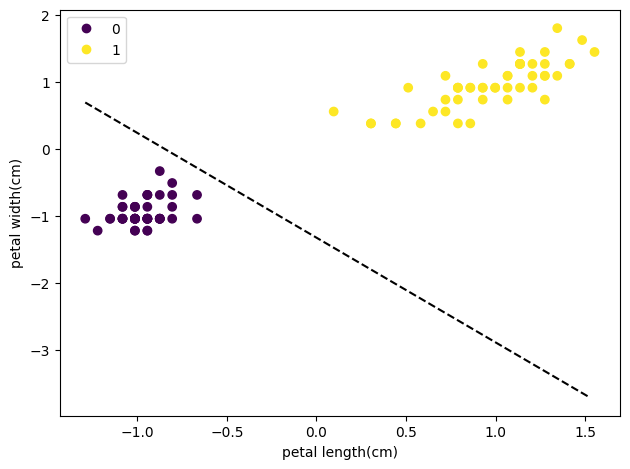

In [11]:
scatter = plt.scatter(X_std[:, 0], X_std[:,1], c=Y)
plt.plot(x_db, decision_boundary, c="black", linestyle="--")

plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")

plt.legend(handles=scatter.legend_elements()[0], labels=[0,1], loc="best")

plt.tight_layout()
plt.show()